In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from helpers import cust_func

%matplotlib inline
#plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use("fivethirtyeight")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
wine_data = datasets.load_wine(as_frame=True)

In [6]:
X, y = wine_data.data, wine_data.target

In [10]:
steps = [("scaler", MinMaxScaler()), ("kmeans", KMeans(n_clusters = 3, random_state=42))]
kmeans_pipe = Pipeline(steps)
kmeans_pipe.fit(X)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [11]:
# create pipeline with a scaler 
pca_steps = [('scaler', MinMaxScaler()), ('pca', PCA())]
pca_pipe = Pipeline(pca_steps)

In [12]:
fscores = pca_pipe.fit_transform(X)

In [15]:
# Percentage of variance explained by the first two components
round(sum(pca_pipe["pca"].explained_variance_ratio_[:2]), 3)

0.597

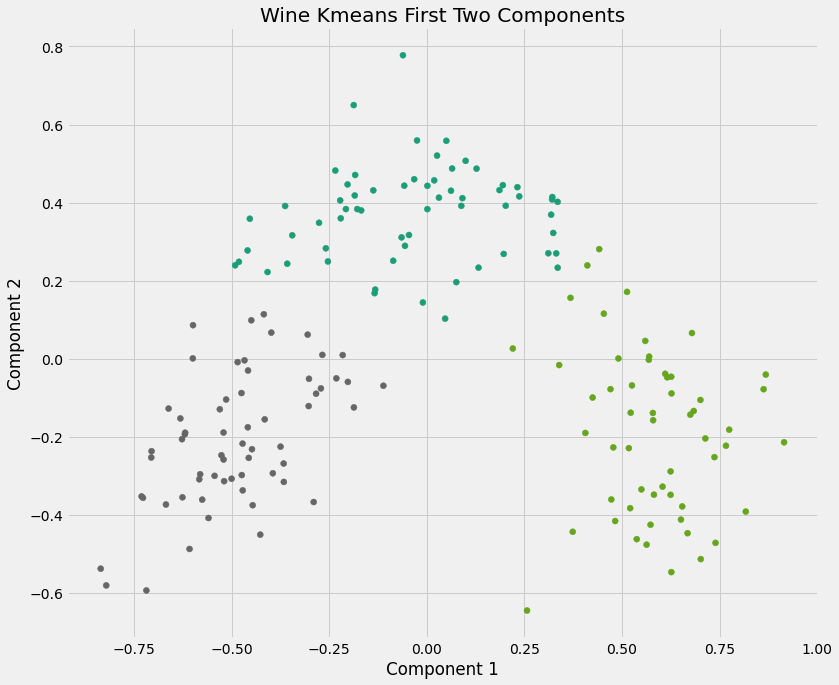

In [16]:
# Plot fscores for first two components
plt.figure(figsize=(12, 12))
sc = plt.scatter(fscores[:, 0], fscores[:, 1],
                 c=kmeans_pipe.predict(X), cmap=plt.cm.get_cmap('Dark2', 3))
ax = sc.axes
ax.set_aspect('equal')
plt.title("Wine Kmeans First Two Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()